# **Описание проекта**

Мы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?


Партнёры просят подготовить исследование рынка. У нас есть открытые данные о заведениях общественного питания в Москве.

# **План выполнения проекта**

1. **Загрузите данные и подготовьте их к анализу**

Загрузить данные о заведениях общественного питания Москвы. Убедиться, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработать их.
Путь к файлу: /datasets/rest_data.csv.

2. **Анализ данных**
- Исследовать соотношение видов объектов общественного питания по количеству. Построить график.
- Исследовать соотношение сетевых и несетевых заведений по количеству. Построить график.
- Для какого вида объекта общественного питания характерно сетевое распространение?
- Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
- Для каждого вида объекта общественного питания описать среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Построить графики.
- Выделить в отдельный столбец информацию об улице из столбца address .
- Построить график топ-10 улиц по количеству объектов общественного питания. Воспользоваться внешней информацией и ответить на вопрос — в каких районах Москвы находятся эти улицы?
- Найти число улиц с одним объектом общественного питания. Воспользоваться внешней информацией и ответить на вопрос — в каких районах Москвы находятся эти улицы?
- Сделать общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментировать возможность развития сети.

3. **Подготовка презентации**

Подготовить презентацию исследования для инвесторов. Для создания презентации использовать любой удобный инструмент, но отправить презентацию нужно обязательно в формате pdf. Приложить ссылку на презентацию в markdown-ячейке в формате.

# Описание данных
Таблица rest_data:
- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})
import requests

import scipy.stats as stats
from scipy import stats as st
from pandas.io.json import json_normalize
from pprint import pprint
import json


import math
import numpy as np

Первым делом получим сами данные.

In [2]:
df = pd.read_csv('/datasets/rest_data.csv')

А теперь со всех сторон посмотрим на данные.

In [3]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [5]:
df.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

Нулевых значений нет.

Чтобы было более читаемо и понятно, выполним следующие действия:
- переименуем столбец number, чтобы было сразу понятно, что это число посадочных мест.
- приведём к нижнему регистру.
- уберём знаки препинания в адресах, чтобы было проще с ними работать.
- заменим в адресах "ё" на "е".

In [6]:
df = df.rename(columns={'number':'number_of_seats'})

In [7]:
df['object_name'] = df['object_name'].str.lower()
df['object_type'] = df['object_type'].str.lower()
df['address'] = df['address'].str.lower()

In [8]:
symbols = [',', '«', '»', '(', ')', '"', '  ']
for s in symbols:
    df['object_name'] = df['object_name'].str.replace(s, ' ')
    df['address'] = df['address'].str.replace(s, ' ')

/tmp/ipykernel_882/1505276953.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['object_name'] = df['object_name'].str.replace(s, ' ')
/tmp/ipykernel_882/1505276953.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['address'] = df['address'].str.replace(s, ' ')


In [9]:
df['address'] = df['address'].str.replace('ё','е')

Удалим возможные дубли и проверим, остались ли такие. Проверяем по имени заведения, типу и адресу. Вряд ли ведь в однмо здании будет два одинаковых заведения.

In [10]:
df.duplicated(subset = ['object_name', 'object_type', 'address']).sum()

184

In [11]:
184/15366 * 100

1.1974489131849537

Дублей чуть больше одного процента, скорее всего это ошибки базы или выгрузки. Можем удалить, их не боясь существенно изменить возможный результат исследования.

In [12]:
df = df.drop_duplicates(subset = ['object_name', 'object_type', 'address']).reset_index()

In [13]:
df.duplicated().sum()

0

In [14]:
df.head(10)

,index,id,object_name,chain,object_type,address,number_of_seats
0,0,151635,сметана,нет,кафе,город москва улица егора абакумова дом 9,48
1,1,77874,родник,нет,кафе,город москва улица талалихина дом 2/1 корпус 1,35
2,2,24309,кафе академия,нет,кафе,город москва абельмановская улица дом 6,95
3,3,21894,пиццетория,да,кафе,город москва абрамцевская улица дом 1,40
4,4,119365,кафе вишневая метель,нет,кафе,город москва абрамцевская улица дом 9 корпус 1,50
5,5,27429,стол. при гоу сош № 1051,нет,столовая,город москва абрамцевская улица дом 15 корпус 1,240
6,6,148815,брусника,да,кафе,город москва переулок сивцев вражек дом 6/2,10
7,7,20957,буфет мтуси,нет,столовая,город москва авиамоторная улица дом 8 строение 1,90
8,8,20958,кпф семья-1,нет,столовая,город москва авиамоторная улица дом 8 строение 1,150
9,9,28858,столовая мтуси,нет,столовая,город москва авиамоторная улица дом 8 строение 1,120


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15182 entries, 0 to 15181
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            15182 non-null  int64 
 1   id               15182 non-null  int64 
 2   object_name      15182 non-null  object
 3   chain            15182 non-null  object
 4   object_type      15182 non-null  object
 5   address          15182 non-null  object
 6   number_of_seats  15182 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 830.4+ KB


Действительно, строк стало меньше, чем при первом просмотре. Видимо дубли всё-таки были.

## Анализ данных

### Исследовать соотношение видов объектов общественного питания по количеству. Построить график.

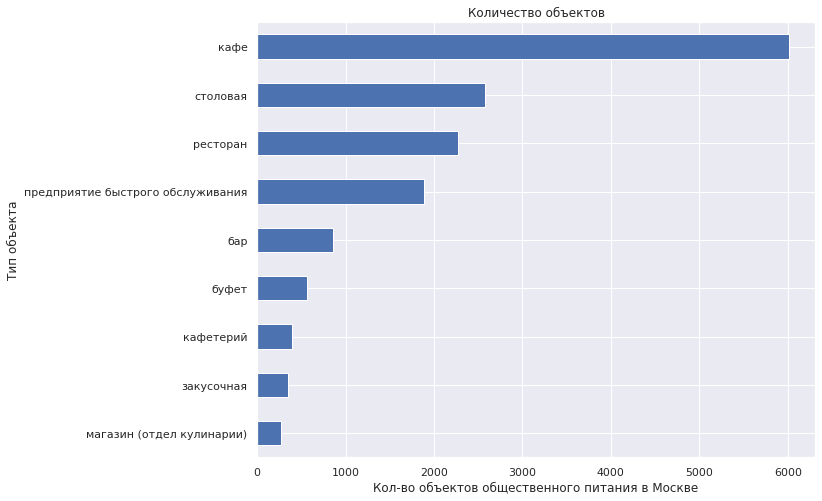

In [16]:
ax = df.groupby('object_type')['object_name'].count().sort_values().plot(kind='barh')
ax.set_xlabel('Кол-во объектов общественного питания в Москве')
ax.set_ylabel('Тип объекта')
ax.set_title('Количество объектов')
plt.show()

Очевидно, что кафе намного больше, чем других заведений. Много столовых (я честно думал, что их намного меньше). Также выделяются рестораны и предприятия быстрого обслуживания.

### Исследовать соотношение сетевых и несетевых заведений по количеству. Построить график.

In [17]:
# заменим значения, чтобы удобнее было читать данные и графики
df['chain'] = df['chain'].map({'нет':'несетевое','да':'сетевое'}) 
df.groupby('chain')['object_name'].count().sort_values()

chain
сетевое       2948
несетевое    12234
Name: object_name, dtype: int64

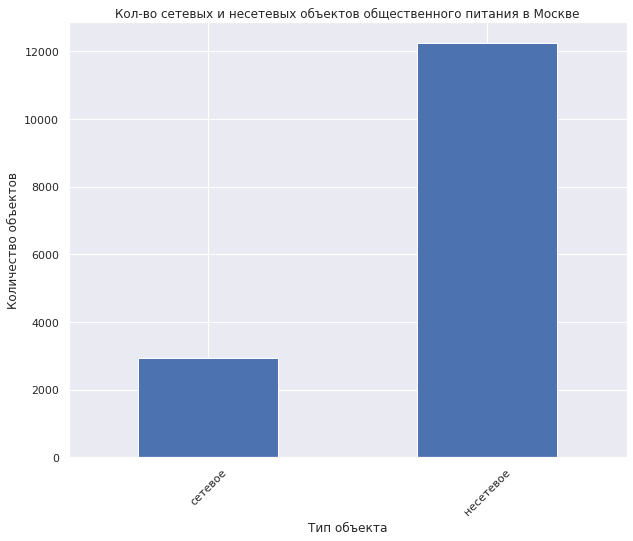

In [18]:
ax = df.groupby('chain')['object_name'].count().sort_values().plot(kind='bar')
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество объектов')
ax.set_title('Кол-во сетевых и несетевых объектов общественного питания в Москве')
plt.xticks(rotation=45)
plt.show()

Несетевых заведений в 4 с лишним раза больше сетевых. Всё-таки люди любят уникальный сервис и подход к обслуживанию, а не типовые заведения.

### Для какого вида объекта общественного питания характерно сетевое распространение?

Посчитаем общее число заведений

In [19]:
df_net = df.groupby(by='object_type')['chain','id'].count()#.plot(kind='bar')
df_net

/tmp/ipykernel_882/3407774019.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_net = df.groupby(by='object_type')['chain','id'].count()#.plot(kind='bar')


,chain,id
object_type,,
бар,853,853
буфет,570,570
закусочная,347,347
кафе,6008,6008
кафетерий,393,393
магазин (отдел кулинарии),272,272
предприятие быстрого обслуживания,1890,1890
ресторан,2274,2274
столовая,2575,2575


Выделим из них сетевые

In [20]:
net = 'сетевое'
temp = df.query('chain == @net')

In [21]:
df_net['net'] = temp.groupby('object_type')['id'].count()
df_net

,chain,id,net
object_type,,,
бар,853,853,37
буфет,570,570,11
закусочная,347,347,56
кафе,6008,6008,1387
кафетерий,393,393,51
магазин (отдел кулинарии),272,272,78
предприятие быстрого обслуживания,1890,1890,784
ресторан,2274,2274,541
столовая,2575,2575,3


Рассчитаем процент сетевых и отсортируем по убыванию

In [22]:
df_net['net_procent'] = round(df_net['net']/df_net['chain']*100, 2)
df_net.sort_values(by='net_procent', ascending=False)

,chain,id,net,net_procent
object_type,,,,
предприятие быстрого обслуживания,1890,1890,784,41.48
магазин (отдел кулинарии),272,272,78,28.68
ресторан,2274,2274,541,23.79
кафе,6008,6008,1387,23.09
закусочная,347,347,56,16.14
кафетерий,393,393,51,12.98
бар,853,853,37,4.34
буфет,570,570,11,1.93
столовая,2575,2575,3,0.12


In [23]:
df_net.sort_values(by='net_procent', ascending=False)['net_procent']

object_type
предприятие быстрого обслуживания    41.48
магазин (отдел кулинарии)            28.68
ресторан                             23.79
кафе                                 23.09
закусочная                           16.14
кафетерий                            12.98
бар                                   4.34
буфет                                 1.93
столовая                              0.12
Name: net_procent, dtype: float64

Видно, что наибольший процент сетевых заведений у предприятий быстрого обслуживания (кто бы мог подумать, ага). С отрывом от фаст-фуда расположились кулинарные магазины, рестораны и кафе.

Самый маленький процент сетевых заведеий у буфетов и столовых.

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [24]:
net_chain = temp.groupby('object_name').agg({'object_name':'count', 'number_of_seats':'median'})
net_chain

,object_name,number_of_seats
object_name,,
кафе кулинарная лавка братьев караваевых,2,9.0
beverly hills diner,1,88.0
bierloga,1,75.0
black & white,1,40.0
bocconcino,3,68.0
...,...,...
ямми микс,1,2.0
ян примус,1,300.0
японский ресторан ваби-саби,1,155.0


In [25]:
x = net_chain['number_of_seats']
y = net_chain['object_name']

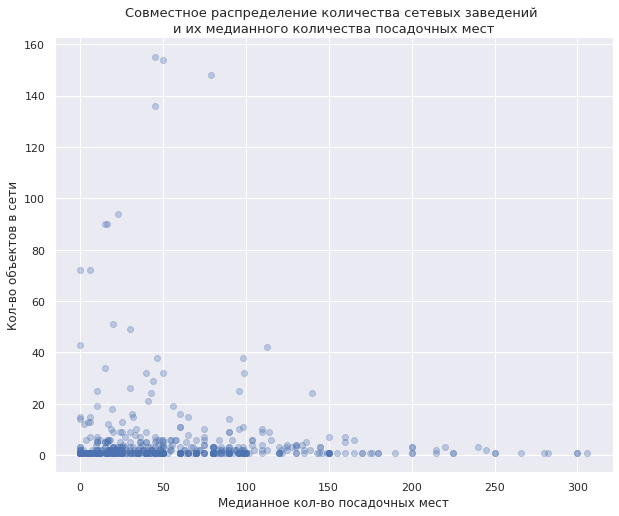

In [26]:
plt.scatter(x, y, alpha = 0.3)
plt.xlabel('Медианное кол-во посадочных мест')
plt.ylabel('Кол-во объектов в сети')
plt.title('Совместное распределение количества сетевых заведений \nи их медианного количества посадочных мест', fontsize=13)
plt.show()

Хорошо видно, что большинство сетей включают в себя небольшое число точек (до 20) и предназначены для обслуживания до 100 гостей заведения.

Число сетей с большим числом точек невелико. Это логично, реально большие сети можно по пальцам пересчитать. Также мало количество заведений с числом посадочных мест более 150.

In [27]:
temp['number_of_seats'].describe()

count    2948.000000
mean       53.001018
std        57.229347
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number_of_seats, dtype: float64

Есть нулевые значения. Скорее всего это заведения работающие на вынос. Не будем их трогать.

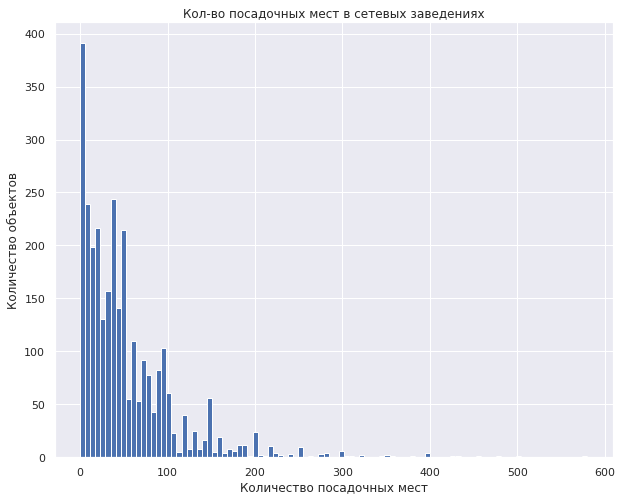

In [28]:
ax = temp['number_of_seats'].hist(bins=100)
ax.set_xlabel('Количество посадочных мест')
ax.set_ylabel('Количество объектов')
ax.set_title('Кол-во посадочных мест в сетевых заведениях')
plt.show()

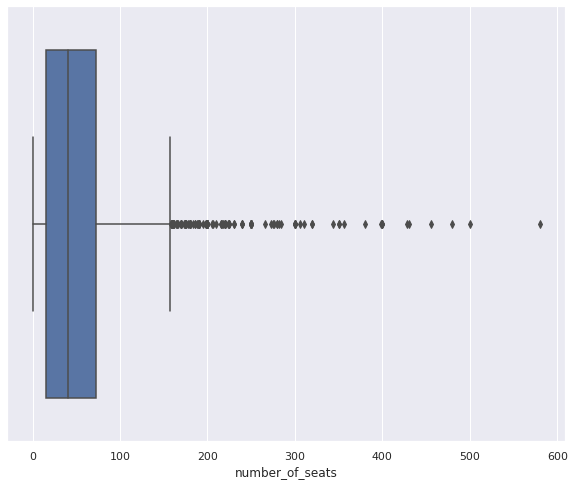

In [29]:
ax = sns.boxplot(x=temp['number_of_seats'])

Видим, что больше всего маленьких заведений с средним число посетителей. Но есть и выбросы на 400+ посадочных мест. Подозреваю, что это те самые сетевые столовые. Как правило заведения именн такого типа склонны к большому размеру. Но большинство точек сосредоточены в пределах 60 посадочных мест.

### Для каждого вида объекта общественного питания описать среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Построить графики.

In [30]:
my_order = df.groupby(by=["object_type"])["number_of_seats"].median().sort_values(ascending = False).index
my_order

Index(['столовая', 'ресторан', 'бар', 'буфет', 'кафе', 'кафетерий',
       'предприятие быстрого обслуживания', 'закусочная',
       'магазин (отдел кулинарии)'],
      dtype='object', name='object_type')

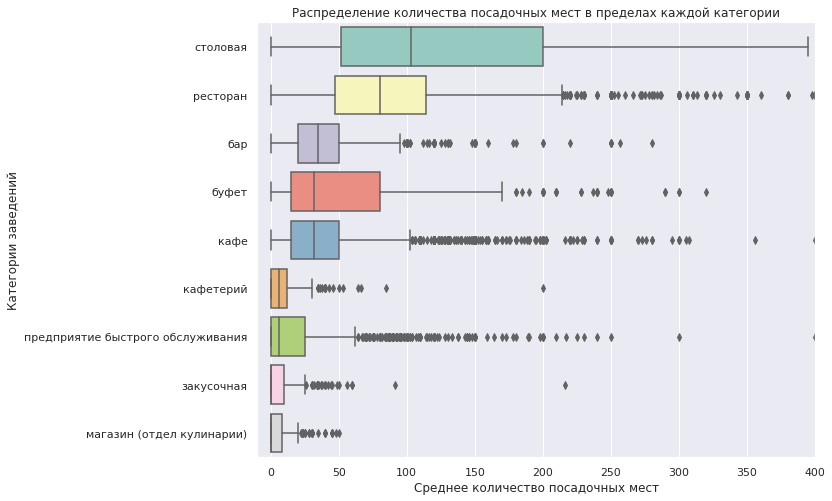

In [31]:
ax = sns.boxplot(x='number_of_seats', y='object_type', data=df,  palette="Set3", order = my_order)
ax.set_xlim(-10,400)

ax.set_title('Распределение количества посадочных мест в пределах каждой категории')
ax.set_xlabel('Среднее количество посадочных мест')
ax.set_ylabel('Категории заведений')
plt.show()

График показывает, что столовые и рестораны явно отдичаются от других типов заведений по среднему числу посадочных мест. Оно и понятно, такие заведения как правило и рассчитаны на большое число одновременных посетителей.

### Выделить в отдельный столбец информацию об улице из столбца address .

Получим общий список улиц.

In [32]:
streets = df['address'].to_list()

Искомое название улицы находится аакурат между "москва" и "дом". Вытащим эти названия в отдельный список. И добавим отдельным столбцом в наш датафрейм.

In [33]:
streets_only = []
for street in streets:  
    start = street.find('город москва')
    end = street.find('дом ')
    streets_only.append(street[start+12:end-1])

In [34]:
df['street_name'] = streets_only
df.head(10)

,index,id,object_name,chain,object_type,address,number_of_seats,street_name
0,0,151635,сметана,несетевое,кафе,город москва улица егора абакумова дом 9,48,улица егора абакумова
1,1,77874,родник,несетевое,кафе,город москва улица талалихина дом 2/1 корпус 1,35,улица талалихина
2,2,24309,кафе академия,несетевое,кафе,город москва абельмановская улица дом 6,95,абельмановская улица
3,3,21894,пиццетория,сетевое,кафе,город москва абрамцевская улица дом 1,40,абрамцевская улица
4,4,119365,кафе вишневая метель,несетевое,кафе,город москва абрамцевская улица дом 9 корпус 1,50,абрамцевская улица
5,5,27429,стол. при гоу сош № 1051,несетевое,столовая,город москва абрамцевская улица дом 15 корпус 1,240,абрамцевская улица
6,6,148815,брусника,сетевое,кафе,город москва переулок сивцев вражек дом 6/2,10,переулок сивцев вражек
7,7,20957,буфет мтуси,несетевое,столовая,город москва авиамоторная улица дом 8 строение 1,90,авиамоторная улица
8,8,20958,кпф семья-1,несетевое,столовая,город москва авиамоторная улица дом 8 строение 1,150,авиамоторная улица
9,9,28858,столовая мтуси,несетевое,столовая,город москва авиамоторная улица дом 8 строение 1,120,авиамоторная улица


Проверим, не потерялись ли какие-то адреса.

In [35]:
df[df['street_name'] == ''].count()

index              0
id                 0
object_name        0
chain              0
object_type        0
address            0
number_of_seats    0
street_name        0
dtype: int64

Отлично, никто не забыт, ничто не забыто.

Очень странно. По идее в наш наблон они попадают, но по какой-то причине на обработались корректно. Пойдём дальше, но галочку себе на будущее поставим.

### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [36]:
temp = df.groupby('street_name').agg({'object_type':'count'}).sort_values(by='object_type', ascending=False).head(10).reset_index()
top_10 = list(temp['street_name'])
temp

,street_name,object_type
0,проспект мира,196
1,профсоюзная улица,180
2,ленинградский проспект,169
3,пресненская набережная,165
4,варшавское шоссе,153
5,ленинский проспект,147
6,проспект вернадского,125
7,кутузовский проспект,114
8,каширское шоссе,102
9,кировоградская улица,101


In [37]:
top_10

[' проспект мира',
 ' профсоюзная улица',
 ' ленинградский проспект',
 ' пресненская набережная',
 ' варшавское шоссе',
 ' ленинский проспект',
 ' проспект вернадского',
 ' кутузовский проспект',
 ' каширское шоссе',
 ' кировоградская улица']

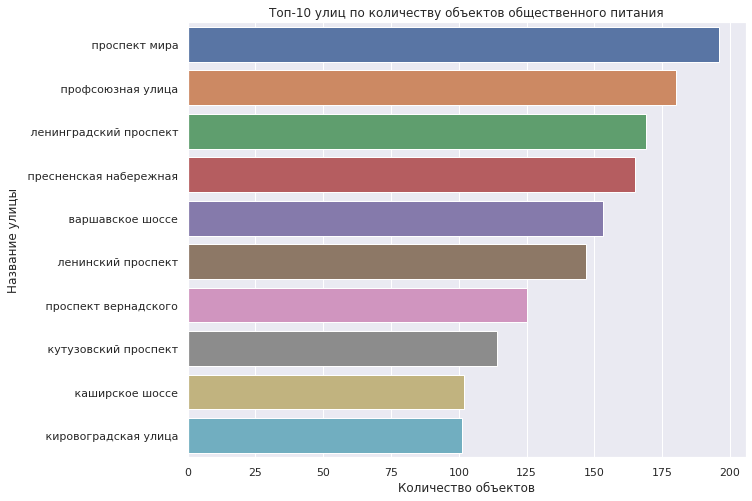

In [38]:
ax = sns.barplot(x='object_type', y='street_name', data=temp)
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Название улицы')
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
plt.show()

Загрузим данные о районах в отдельную таблицу

In [39]:
area = pd.read_csv('https://frs.noosphere.ru/xmlui/bitstream/handle/20.500.11925/714058/mosgaz-streets.csv?sequence=1&isAllowed=y')

Чтобы корректно сравнить внешние данные с нашими, переименуем столбец с названием улицы и приведём данные к нижнему регистру.

In [40]:
area = area.rename(columns={'streetname':'street_name'})
area['street_name'] = area['street_name'].str.lower()
area.head()

,street_name,areaid,okrug,area
0,выставочный переулок,17,ЦАО,Пресненский район
1,улица гашека,17,ЦАО,Пресненский район
2,большая никитская улица,17,ЦАО,Пресненский район
3,глубокий переулок,17,ЦАО,Пресненский район
4,большой гнездниковский переулок,17,ЦАО,Пресненский район


Создадим новую таблицу с улицами из нашего топ-10.

In [41]:
temp_street = pd.DataFrame(top_10, columns=['street_name'])
temp_street['street_name'] = temp_street['street_name'].str.strip()
temp_street

,street_name
0,проспект мира
1,профсоюзная улица
2,ленинградский проспект
3,пресненская набережная
4,варшавское шоссе
5,ленинский проспект
6,проспект вернадского
7,кутузовский проспект
8,каширское шоссе
9,кировоградская улица


Присоединим сюда данные из таблицы с районами. В качестве ключа для объединения используем название улицы.

In [42]:
pd.merge(temp_street, area, on='street_name', how='inner')


,street_name,areaid,okrug,area
0,проспект мира,70,СВАО,Алексеевский район
1,проспект мира,86,СВАО,Ярославский Район
2,проспект мира,78,СВАО,Район Марьина роща
3,проспект мира,79,СВАО,Останкинский район
4,проспект мира,81,СВАО,Район Ростокино
5,проспект мира,82,СВАО,Район Свиблово
6,проспект мира,16,ЦАО,Мещанский район
7,профсоюзная улица,123,ЮЗАО,Академический район
8,профсоюзная улица,132,ЮЗАО,Район Черемушки
9,профсоюзная улица,134,ЮЗАО,Район Ясенево


Практически все улицы расположены сразу в нескольких районах. Неудивительно, ведь это одни из самых протяженных улиц в Москве. Логично, что именно на них расположено больше всего заведений.

### Найти число улиц с одним объектом общественного питания. Воспользоваться внешней информацией и ответить на вопрос — в каких районах Москвы находятся эти улицы?

Для начала посмотрим, много ли у нас улиц, на которых всего одно заведение.

In [43]:
temp = df.groupby('street_name').count()
len(temp.query('id == 1'))

829

Оставим в нашей временной таблице только нужные нам данные.

In [44]:
temp = temp.query('id == 1')
temp = temp.reset_index()

Сделаем список нужных нам улиц.

In [45]:
street_list = list(temp['street_name'])

А теперь оставим в нашем исходном датафрейме только записи с нужными нам улицами.

In [46]:
street_list = df[df['street_name'].isin(street_list)]
street_list['street_name'] = street_list['street_name'].str.strip()
street_list

/tmp/ipykernel_882/2838441440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  street_list['street_name'] = street_list['street_name'].str.strip()


,index,id,object_name,chain,object_type,address,number_of_seats,street_name
19,19,153644,американская лаборатория десертов,несетевое,кафе,город москва филипповский переулок дом 15/5,20,филипповский переулок
61,61,21214,столовая,несетевое,столовая,город москва бабаевская улица дом 3,90,бабаевская улица
69,69,22139,хуанхэ,несетевое,ресторан,город москва 1-й балтийский переулок дом 3/25,60,1-й балтийский переулок
81,81,25833,азербайджан,несетевое,ресторан,город москва улица демьяна бедного дом 4,180,улица демьяна бедного
130,131,150881,вгик,несетевое,столовая,город москва будайская улица дом 3,45,будайская улица
...,...,...,...,...,...,...,...,...
14837,15016,221225,пекарня есть поесть,несетевое,кафе,город москва поселение сосенское поселок комму...,16,поселение сосенское поселок коммунарка улица л...
14838,15017,205588,кофейня,несетевое,кафетерий,город москва поселение щаповское улица евгения...,16,поселение щаповское улица евгения родионова вл...
14848,15027,208936,кафе гурман,несетевое,кафе,город москва поселение первомайское деревня фо...,40,поселение первомайское деревня фоминское лесна...
14858,15037,220765,газпромнефтьцентр,сетевое,кафетерий,город москва каширское шоссе владение 57а,17,каширское шоссе владение 5


Одним действием прикрутим к очищенным данным таблицу с районами и выведем список районов, в кторых есть улицы с одинокими заведениями.

In [47]:
district = pd.merge(street_list, area, on = 'street_name', how = 'left')
district['area'].unique()

array(['Район Арбат', 'Район Сокольники', 'Район Аэропорт',
       'Район Хорошево-Мневники', 'Район Ростокино', nan,
       'Мещанский район', 'Район Беговой', 'Район Хамовники',
       'Тверской район', 'Район Марьина роща', 'Можайский Район',
       'Район Богородское', 'Район Преображенское', 'Район Дорогомилово',
       'Басманный район', 'Район Кунцево', 'Район Лефортово',
       'Савеловский район', 'Донской район', 'Район Котловка',
       'Район Замоскворечье', 'Район Гольяново', 'Район Фили-Давыдково',
       'Район Раменки', 'Район Люблино', 'Район Свиблово',
       'Таганский район', 'Красносельский район', 'Район Якиманка',
       'Рязанский район', 'Район Покровское-Стрешнево',
       'Головинский район', 'Лосиноостровский район',
       'Останкинский район', 'Район Коптево', 'Пресненский район',
       'Район Косино-Ухтомский', 'Район Ивановское', 'Бутырский район',
       'Район Метрогородок', 'Район Щукино', 'Район Внуково',
       'Район Чертаново Южное', 'Район Ясене

Такое, чувство, что это вся Москва. То есть в каждом районе есть улицы, на которых есть всего одно заведение.


Выведем ТОП-10 районов, в которых больше всего улиц с одним заведением.

In [48]:
district.groupby('area').count().sort_values(by = 'id', ascending = False)['index'].head(10)

area
Таганский район        27
Район Хамовники        24
Басманный район        21
Тверской район         20
Пресненский район      19
Район Марьина роща     17
Район Арбат            17
Мещанский район        16
Район Сокольники       15
Район Замоскворечье    14
Name: index, dtype: int64

Ага, есть районы в центре города, где есть улицы всего с одним заведением. Есть смысл обратить внимание на эти районы при подборе места для нашего кафе.

**Итого**

В Москве 828 улиц, на которых есть всего одно заведение общественного питания. Эти улицы разбросаны по всей Москве судя по списку районов. Но есть ряд районов, в которых таких улиц больше всего. Самые интересные для нас это районы центре: Таганский, Хамовники, Басманный, Тверской.

### Общий вывод

Рынок общественного питания в г. Москва уже очень перегружен, это факт. В нашем сегменте **кафе** есть примерно **6 тысяч** заведений. Порядка **80%** из них **несетевые**. Чтобы занять здесь своё место, нужно что-то действительно новое, что сможет заинтересовать клиентов и приводить их к нам регулярно на протяжении долгого времени. Фишка с роботами может сработать на первом этапе для рекламы, но в дальнейшем нужно развиваться и придумывать что-то новое.

Среди сетевых заведений преобладают предприятия быстрого питания (фаст-фуд). Среди них **41%** сетевых заведений. Среди наших потенциальных конкурентов-кафе только **23%** сетевых. Мы собираемся открывать сразу только одно кафе, поэтому сравнить себя с большими сетями преждевременно.

Большая часть кафе предназначена для обслуживания до **50 гостей**. Этот диапазон является оптимальным, а поэтому самым востребованным в городе.

Для оценки возможных мест расположения нашего кафе мы нашли 10 улиц с максимальной загруженностью заведениями. С одной стороны там будет очень серьёзная конкуренция, с другой стороны такое количество заведений говорит о высокой проходимости и большом количестве потенциальных клиентов. Это следующие улицы:
- Проспект мира
- Профсоюзная улица
- Ленинградский проспект
- Пресненская набережная
- Варшавское шоссе
- Ленинский проспект
- Проспект вернадского
- Кутузовский проспект
- Каширское шоссе
- Кировоградская улица

При этом есть районы, в который много улиц всего с одним заведением. Среди них можно выделить районы в центре, где самый большой трафик клиентов:
- Таганский район
- Район Хамовники
- Басманный район
- Тверской район

Опять же специфика нашего робо-кафе такова, что целевой аудиторией будут скорее всего молодые люди, которые на "ты" с новыми технологиями. Поэтому имеет смысл внимательнее изучить районы вокруг крупных бизнес-центров, в которых располагаются офисы крупных технолгических компаний. У их сотрудников наверняка возникнет интерес к кафе с роботами. Такие люди могут и сами часто посещать наше заведение и рассказать о нас своим друзьям, знакомым и подписчикам в социальных сетях.

**Рекомендации** 

1. Оптимальным количеством посетителей для кафе следует принять цифру до 50 человек. Точнее можно будет рассчитать только после выбора конкретного помещения.
2. Искать помещения в первую очередь стоит в районах: Таганский, Хамовники, Басманный, Тверской.
3. Больше внимания уделить изучению целевой аудитории кафе и оценить, в каких районах города наибольшее сосредоточение наших потенциальных клиентов.
4. Делать выводы о потенциале развития сети можно не раньше 3-6 месяцев работы первого кафе. Если будет спрос и проходимость кафе не упадёт после начального этапе на фоне рекламной компании к открытию, можно искать место для новых точек будущей сети на основании тех же критериев, что были для первой точки.

## Презентация

Презентация: https://disk.yandex.ru/i/6UF3KgMZ6YxL5w